In [98]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [99]:
with open('../outputs/train_metrics.pickle', 'rb') as f:
    training_metrics = pickle.load(f)

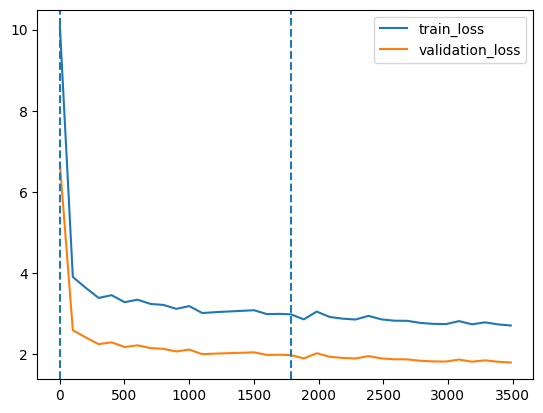

In [102]:
plt.plot(*list(zip(*[(m['global_step'], m['train_loss']) for m in training_metrics])), label='train_loss')
plt.plot(*list(zip(*[(m['global_step'], m['validation_loss']) for m in training_metrics])), label='validation_loss')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--')
plt.legend()
plt.show()

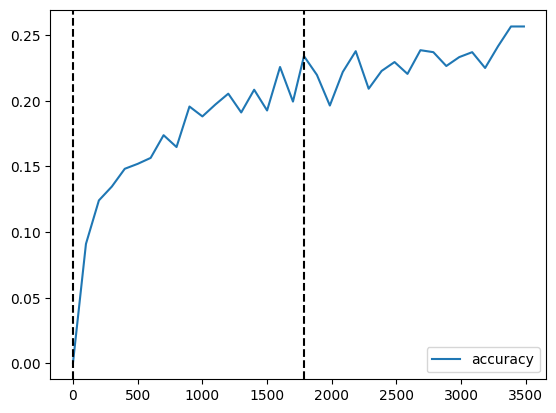

In [103]:
plt.plot(*list(zip(*[(m['global_step'], m['accuracy'].item()) for m in training_metrics])), label='accuracy')
# plt.plot(*list(zip(*[(m['global_step'], m['perplexity'].item()) for m in training_metrics])), label='perplexity')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--', c='black')
# plt.ylim(top=30e3)
plt.legend()
plt.show()

In [104]:
min([m['validation_loss'] for m in training_metrics])

1.8031059503555298

# Final Evaluation Outputs

In [144]:
food_names = np.load('../../data/local/final/full/food_names/0.npy', allow_pickle=True)
food_names.shape

(1109,)

In [145]:
input = training_metrics[-1]['input']
output = training_metrics[-1]['output']

In [146]:
pd.set_option('max_colwidth', None)

In [147]:
pd.DataFrame({
    'input': food_names[input[0]].tolist(), 
    'mask_pos': input[3].tolist(),
    'label': food_names[input[2]].tolist(),
    'prediction': food_names[output.argmax(2)].tolist(), 

})

,input,mask_pos,label,prediction
0,"[gelatin, water, yogurt, sugar, vanilla, cardamom, <mask>, sweet orange, cinnamon, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[6, 0]","[sweet orange, <pad>]","[clove, gelatin]"
1,"[egg roll, <mask>, pudding, sugar, cinnamon, margarine, nut, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[1, 0]","[sugar, <pad>]","[sugar, egg roll]"
2,"[<mask>, butter, sugar, <mask>, sauce, water, cocoa powder, water, salt, potato chip, marshmallow, <pad>, <pad>, <pad>, <pad>]","[3, 0]","[flour, cracker]","[butter, butter]"
3,"[coffee, <mask>, curry powder, sugar substitute, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[1, 0]","[almond, <pad>]","[milk cow, coffee]"
4,"[pie crust, spinach, egg, onion-family vegetable, nutmeg, <mask>, cheese, evaporated milk, salt, pepper, cheese, parsley, <pad>, <pad>, <pad>]","[11, 5]","[parsley, crab]","[parsley, butter]"
...,...,...,...,...
995,"[meat bouillon, onion-family vegetable, green turtle, sauce, garlic, green bean, rice, <mask>, tortilla, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[7, 0]","[cheese, <pad>]","[pepper, meat bouillon]"
996,"[chicken, sauce, walnut, sweet orange, <mask>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[4, 0]","[<unknown>, <pad>]","[sweet orange, chicken]"
997,"[egg, cream, <mask>, honey, <mask>, water, salt, flour, butter, vanilla, domestic pig, butter, syrup, <pad>, <pad>]","[4, 2]","[curry powder, buttermilk]","[sugar, sugar]"
998,"[butter, flour, flour, curry powder, <mask>, sugar, egg, vanilla, milk cow, chocolate, <pad>, <pad>, <pad>, <pad>, <pad>]","[9, 4]","[chocolate, salt]","[chocolate, salt]"
